# Homework 8: Magnetization, Energy in the Ising Model

Physics 177, Spring 2017 (Prof. Tanedo)  
Due: Friday, June 16    

Kyle Perez

# Problem 0

Please be sure to fill out:
1. The course survey (e-mailed directly to you; e-mail Prof. Tanedo if you have not received this!)
2. iEval course evaluation (http://ieval.ucr.edu)
3. Sign up for a "final interview": https://doodle.com/poll/xyb7dgcupq9gwaqm

Done

# Problem 1

Code the Ising model to study the phase transition at $T_c\approx 2.27$ (in units where $J = k_B = 1$). Use the Metropolis algorithm for Markov Chain Monte Carlo, as we set up in Lecture 18: https://github.com/Physics177-2017/Lec18-Ising-Model/blob/master/Lec18-IsingModel.ipynb

**Make the following plots:**
1. Magnetization as a function of temperature
2. Energy as a function of temperature

You may define magnetization as the total spin of the system (sum of the spins of each node). You may define the energy as the sum of $\Delta E_i$ for each spin $i$. Recall that 

$$\Delta E_i = -\sum_{j} s_is_j$$

(Note: actually, you should define $E = \sum_i \Delta E_i/4$, but we don't care about the overall pre-factors, we just want to see the qualitative shapes of the plots.)

**Guidelines**
You should be able to get reasonable results for:
* A $20\times 20$ array.
* Sampling 1000 temperature points between $T=1$ and $T=4$
* Allowing 2000 Monte Carlo steps to draw a sample.

*Pro-tip:* One way to improve your calculations is to let your Monte Carlo "equilibrate" before recording data. In other words, your Markov Chain algorithm should be:

1. Pick a random configuration
2. Run for 2000 steps (without recording data)
3. Perform your Markov Chain algorithm as usual, using the configuration at the end of step 2 as your initial configuration.


Code this up on your own, you may use the code from Lecture 18 as a starting point. 

The *answers* are available in a notebook written by Rajesh Singh:
http://rajeshrinet.github.io/blog/2014/ising-model/
... you may use that notebook (in particular, the plots) as a guideline for what your code should produce. 

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from random import *

N = 20
N_trials = 2000
Tsteps = 1000

In [9]:
def initial(N):
    some_grid = 2 * np.random.randint(2, size=(N,N)) -1
    return some_grid

In [10]:
def spin_update(some_grid, beta, i, j):
    """Input grid + temperature. Prepares to Update a temperature value"""
    spin = some_grid[i,j]
    spin_flip = -spin
    
    net_neighbor_spin = some_grid[(i+1)%N,j] + some_grid[(i-1)%N,j] + some_grid[i,(j+1)%N] + some_grid[i,(j-1)%N]
        
    deltaE = -spin_flip * net_neighbor_spin / 4.0 - (-spin * net_neighbor_spin / 4.0)
    
    if deltaE < 0:
        return -spin
    
    else:
        if random() < np.exp(beta * deltaE):
            return -spin
        else:
            return spin
        
        

#updates grid
def grid_update(some_grid, beta):
    i = randint(0,N-1)
    j = randint(0,N-1)
    some_grid[i,j] = spin_update(some_grid,  beta, i, j)
    return some_grid

In [11]:
#makes temperature array
Tpoints = np.arange(1,4,.003)
TT = np.array(Tpoints)

#beta
invTT = 1 / TT

In [12]:
def Magnetization(some_grid):
    #records magnetization (I found this np.sum in the answers. My other attempt was futile)
    magnet = np.sum(some_grid)
    return magnet

In [13]:
def Energy(some_grid):
    totaleng = 0
    for m in range(N):
        for n in range(N):
            temp = some_grid[m,n]
            weight = some_grid[(m+1)%N, n] + some_grid[(m-1)%N, n] + some_grid[m, (n+1)%N] + some_grid[m, (n-1)%N]
            totaleng += -temp * weight
    return totaleng

In [14]:
#define initial arrays

energy = np.zeros(Tsteps)
magnetization = np.zeros(Tsteps)

#looped up code
for a in range(Tsteps):
    #temporary variable initialization. eng for energy, b for magnetization
    tempeng = 0
    temb = 0
    counteng = 0
    countb = 0
    
    #Grid Initialization
    #grid = np.zeros((N, N))
    i = 0
    j = 0
    """
    for i in range(N):
        for j in range(N):
            grid[i][j] = 2*randint(0,1) - 1
    """
    grid = initial(N)
     
    #This updates the grid
    for b in range(N_trials):
        grid_update(grid, invTT[a])
        
    for c in range(N_trials):
        grid_update(grid, invTT[a])
        tempeng = Energy(grid)
        temb = Magnetization(grid)
        
        counteng += tempeng
        countb += temb
        
        energy[a] = tempeng
        magnetization[a] = temb
        
BB = np.array(magnetization)
EE = np.array(energy)

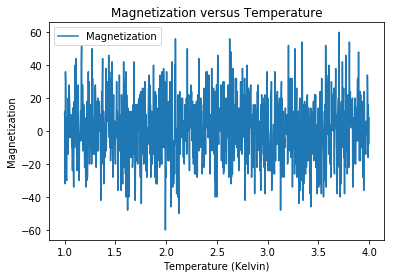

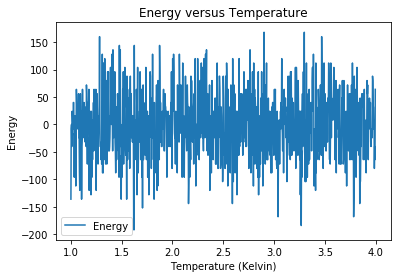

In [15]:
plt.plot(TT, BB, label='Magnetization')
plt.title("Magnetization versus Temperature")
plt.xlabel('Temperature (Kelvin)')
plt.ylabel('Magnetization')
plt.legend()
plt.show()


plt.plot(TT, EE, label='Energy')
plt.title("Energy versus Temperature")
plt.xlabel('Temperature (Kelvin)')
plt.ylabel('Energy')
plt.legend()
plt.show()

So, you see that I tried to make a solution similar to the solution we were provided, yet got nothing.

I could not find where I went wrong.